<a href="https://colab.research.google.com/github/XiaoTanOvO/Financial_Big_Data_Analysis/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 證交所資訊

In [ ]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd
# 用於繪製圖表。
import matplotlib.pyplot as plt


# 定義爬取資料的函式

# 定義一個函數它接收兩個參數：股票代碼和查詢日期，用於從台灣證券交易所爬取股價資料。
def get_twse_stock_data(stock_id, date):
  # 生成目標URL，用於請求特定股票在指定日期的日線交易資料。
  url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date={date}&stockNo={stock_id}"
  # 發送HTTP GET請求，並獲取該URL的回應。
  response = requests.get(url)
  # 解析HTML內容，方便後續提取需要的數據。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 檢查html的格式(tr、td、th等)
  # table = soup.find_all('table')
  # print(table)

  # 解析表格資料

  # 從表格中提取所有的行（tr），這些行包含了每一天的股價資料。
  rows = soup.find_all('tr')
  # 初始化一個空的列表data，用來存儲每一行提取出來的股價資料。
  data = []

  # 遍歷表格中的所有行，跳過前兩行，因為它們是標題或欄位名稱。
  for row in rows[2:]:
    # 從每一行提取所有單元格（td），這些單元格包含了具體的股價數據。
    cols = row.find_all('td')
    # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本。
    cols = [col.text.strip() for col in cols]
    # 檢查是否為有效非空的數據行，有數據就將添加到data列表中。
    if len(cols) > 0:
      data.append(cols)

  # 建立 DataFrame

  # 我們選取列表中的第二行（index為1），這是表格的欄位名稱，然後查找所有的欄位名稱單元格（th），結果存儲在列表，這些元素對應於表格的每一列名稱。
  header = rows[1].find_all('th')
  # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本。
  columns = [th.text.strip() for th in header]
  # columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
  # 將列表轉換成pandas DataFrame，並將剛才定義的列名稱分配給DataFrame的列。
  df = pd.DataFrame(data, columns=columns)

  # 轉換數據類型
  df['日期'] = df['日期'].str.replace(',', '')
  df['成交股數'] = df['成交股數'].str.replace(',', '').astype(int)
  df['成交金額'] = df['成交金額'].str.replace(',', '').astype(int)
  df['開盤價'] = df['開盤價'].str.replace(',', '').astype(float)
  df['最高價'] = df['最高價'].str.replace(',', '').astype(float)
  df['最低價'] = df['最低價'].str.replace(',', '').astype(float)
  df['收盤價'] = df['收盤價'].str.replace(',', '').astype(float)
  df['漲跌價差'] = df['漲跌價差'].str.replace(',', '')
  df['成交筆數'] = df['成交筆數'].str.replace(',', '').astype(int)

  return df

stock_id = '2330'  # 台積電
date = '20240901'  # 查詢日期
# 呼叫剛才定義的函數來獲取指定股票在特定日期的交易數據，並將結果存儲。
twse_df = get_twse_stock_data(stock_id, date)
twse_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,19272593,18270058260,950.0,955.0,943.0,948.0,+4.00,31642
1,113/09/03,23205623,21908471541,948.0,952.0,939.0,940.0,-8.00,47139
2,113/09/04,93169835,83424133824,894.0,905.0,888.0,889.0,-51.00,393210
3,113/09/05,34147890,30998595394,907.0,915.0,900.0,902.0,+13.00,63902
4,113/09/06,28248063,25786016936,909.0,918.0,903.0,918.0,+16.00,38415
5,113/09/09,38448946,34456838126,892.0,900.0,891.0,899.0,-19.00,102365
6,113/09/10,34312646,31067424234,907.0,911.0,901.0,904.0,+5.00,45141
7,113/09/11,19513256,17621000956,906.0,906.0,900.0,901.0,-3.00,30789
8,113/09/12,43749260,40999951508,936.0,944.0,928.0,940.0,X0.00,80643
9,113/09/13,28307441,26795862243,955.0,955.0,939.0,947.0,+7.00,39071


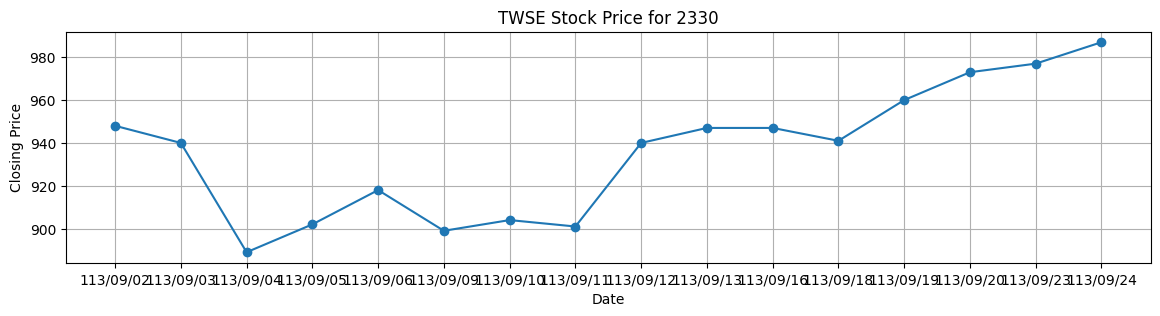

In [ ]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(twse_df['日期'], twse_df['收盤價'], marker='o', linestyle='-')
plt.title(f'TWSE Stock Price for {stock_id}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 2. Yahoo API股市資訊

In [ ]:
# 使用Yahoo Finance API來獲取股票資料。
import yfinance as yf
# 用於資料操作，特別是表格資料的處理。
import pandas as pd
# 使表格完整顯示。
pd.set_option('display.max_rows', None)

# 定義一個函數它接收一個參數：股票代號，用於從Yahoo Finance爬取股價資料。
def get_yahoo_stock_data(ticker):
  # 創建了一個股票代號的物件，允許我們訪問該股票的歷史數據、基本面資料等。
  stock = yf.Ticker(ticker)
  # 獲取該股票過去一個月(1mo)的歷史股價數據，並將結果存儲。period參數可以設置不同的時間範圍，如'1d'、'5d'、'1mo'、'1y'等。
  df = stock.history(period="1y")
  # 重置時間索引並轉換為列。
  df = df.reset_index()
  # print(df)
  # 刪除原本的列名稱並設定新的列名稱。
  new_columns = ['日期', '開盤價', '最高價', '最低價', '收盤價', '成交量', '股利', '股票分割']
  df.columns = new_columns  # 設置新的列名稱
  return df

ticker = "2330.TW"  # 台積電在Yahoo的代號
# 呼叫剛才定義的函數來獲取指定股票過去一個月的歷史股價數據，並將結果存儲。
yahoo_df = get_yahoo_stock_data(ticker)
yahoo_df = pd.DataFrame(yahoo_df)
yahoo_df

,日期,開盤價,最高價,最低價,收盤價,成交量,股利,股票分割
0,2023-10-18 00:00:00+08:00,539.110087,539.110087,530.272217,530.272217,26418940,0.000000,0.0
1,2023-10-19 00:00:00+08:00,530.272270,538.128156,530.272270,536.164185,22881262,0.000000,0.0
2,2023-10-20 00:00:00+08:00,539.110049,545.983948,536.164093,545.983948,45984177,0.000000,0.0
3,2023-10-23 00:00:00+08:00,542.056019,543.038004,533.218149,534.200134,22747367,0.000000,0.0
4,2023-10-24 00:00:00+08:00,533.218149,536.164105,530.272192,534.200134,15007814,0.000000,0.0
5,2023-10-25 00:00:00+08:00,534.200134,541.074033,534.200134,534.200134,16526355,0.000000,0.0
6,2023-10-26 00:00:00+08:00,520.452402,525.362330,520.452402,521.434387,28188348,0.000000,0.0
7,2023-10-27 00:00:00+08:00,524.380362,526.344334,522.416391,523.398376,15679643,0.000000,0.0
8,2023-10-30 00:00:00+08:00,521.434335,524.380292,518.488379,522.416321,21404842,0.000000,0.0
9,2023-10-31 00:00:00+08:00,525.362312,525.362312,517.506427,519.470398,25667058,0.000000,0.0


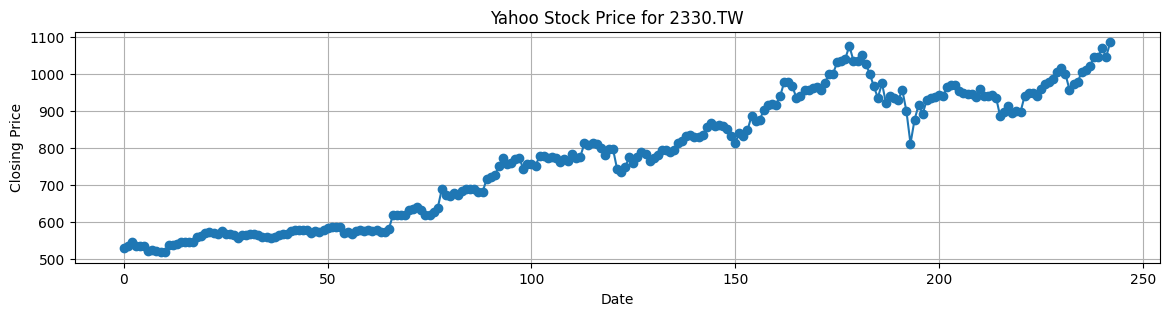

In [ ]:
# 用於繪製圖表。
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(14, 3))
plt.plot(yahoo_df.index, yahoo_df['收盤價'], marker='o', linestyle='-')
plt.title(f'Yahoo Stock Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 3. Yahoo 靜態爬蟲股市資訊

In [ ]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd

# 定義一個函數，接收一個參數，用來指定要抓取的網頁位址。
def scrape_yahoo_table(url):
  # 傳送HTTP GET請求，取得指定URL的頁面內容，並將其儲存。
  response = requests.get(url)
  # 檢查HTTP回應的狀態碼是否為200，表示請求成功。
  if response.status_code != 200:
    # 如果狀態碼不是200，拋出異常，並顯示錯誤訊息。
    raise Exception(f"Failed to load page:{url}")
  # 將回應內容（HTML文字）解析。使得我們能夠方便地從HTML文件中提取資料。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 尋找HTML文件中符合特定class屬性的table元素，指定了該元素的CSS類別名，這是網頁開發者用來定義樣式的。
  table = soup.find('table', {'class': 'W(100%) Pos(r) Tbl(f) Bdcl(c) BdB Bdc($seperatorColor)'}) # 查找表格

  # 檢查是否成功找到表格元素。
  if not table:
    # 如果沒有找到表格，請拋出異常並給出錯誤提示。
    raise Exception("Table not found in the page")

  # 提取欄位名稱

  # 初始化一個空列表，用於儲存表格的欄位名稱。
  headers = []
  # 找出表格的<thead>部分，通常包含欄位名稱。尋找所有的<th>，這些元素是欄位名稱單元格。
  for th in table.find('thead').find_all('th'):
    # 對每個欄位名稱單元格，提取其文字內容，去除首尾的空白字符，然後將其新增至列表中。
    headers.append(th.text.strip())

  # 提取表格資料

  # 初始化一個空列表，用於儲存表格中的每一行資料。
  rows = []
  # 尋找表格的<tbody>部分，通常包含表格的主體資料。尋找所有的<tr>，這些元素代表表格中的每一行。
  for tr in table.find('tbody').find_all('tr'):
    # 初始化一個空列表，用於儲存目前行中的每一列資料。
    cells = []
    # 在目前行<tr>中尋找所有的<td>，這些元素代表表格中的每一列資料。
    for td in tr.find_all('td'):
      # 對每個單元格，提取其文字內容，去除首尾的空白字符，然後將其添加到列表中。
      cells.append(td.get_text(strip=True))
    # 將每一行清單新增至清單中，清單最終包含了表格的所有資料行。
    rows.append(cells)

  # 將資料轉換為 DataFrame

  # 將提取的資料轉換，並將先前提取的欄位名稱作為列名。
  df = pd.DataFrame(rows, columns=headers)
  # 回傳建置好的DataFrame，方便後續資料分析或展示。
  return df

# 設定要爬取資料的目標URL。
url = 'https://finance.yahoo.com/lookup?s=%7BTICKER%7D'
# 呼叫函數，將傳回從指定URL中提取的表格資料並儲存在df中。
df = scrape_yahoo_table(url)
# 直接列印或查看df，將顯示爬取到的表格資料。
df

,Symbol,Last Price,Change,% Change
0,NVDANVIDIA Corporation,121.29,+5.03,+4.32%
1,BABAAlibaba Group Holding Limited,96.63,+6.54,+7.26%
2,VVisa Inc.,276.19,-12.44,-4.31%
3,"SEELSeelos Therapeutics, Inc.",0.3408,+0.1508,+79.37%
4,PDDPDD Holdings Inc.,112.70,+10.40,+10.17%


# 4. Yahoo 動態爬蟲股市資訊(測試)

In [ ]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd
# 用於繪製圖表。
import matplotlib.pyplot as plt

# 爬取Yahoo Finance的股票數據函式

# 定義一個函數它接收一個參數：股票代碼，用於從Yahoo Finance所爬取股價資料。
def scrape_yahoo_stock_data(ticker):
  # 生成Yahoo Finance股票歷史數據頁面URL，將具體股票代碼插入。
  url = f'https://finance.yahoo.com/quote/{ticker}/history?p={ticker}'

  # 發送HTTP GET請求，並獲取該URL的回應。
  response = requests.get(url)
  # 解析HTML內容，方便後續提取需要的數據。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 查找歷史數據表格

  # 查找包含歷史股價資訊的表格，帶有data-test="historical-prices"的屬性。
  table = soup.find('table', {'data-test': 'Historical Data'})
  print(table)

  # 擷取表格的欄位名稱資訊，用於後續設定DataFrame的列名。
  headers = [header.text for header in table.find_all('th')]

  # 提取表格数据

  # 尋找表格中的所有行（tr），跳過欄位名稱行。
  rows = table.find_all('tr')[1:]
  # 初始化一個空的列表data，用來存儲每一行提取出來的股價資料。
  data = []
  # 遍歷表格中的所有行
  for row in rows:
    # 在每一行中查找所有單元格（td），並將這些單元格儲存在列表中。
    cols = row.find_all('td')
    # 过滤掉不包含完整数据的行（比如广告行或空行）。一个有效的股票数据行通常有 7 个 td 元素。
    if len(cols) < 7:
      # 如果某行資料列不足7個，跳過這行資料。
      continue
    # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本將添加到data列表中。
    data.append([col.text.strip() for col in cols])

  # 将數據轉化為DataFrame
  df = pd.DataFrame(data, columns=headers)

  # 處理日期、價格和成交量的格式
  df['Date'] = pd.to_datetime(df['Date'])
  df['Open'] = df['Open'].str.replace(',', '').astype(float)
  df['High'] = df['High'].str.replace(',', '').astype(float)
  df['Low'] = df['Low'].str.replace(',', '').astype(float)
  df['Close*'] = df['Close*'].str.replace(',', '').astype(float)
  df['Adj Close**'] = df['Adj Close**'].str.replace(',', '').astype(float)
  df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

  # 重新命名欄位名稱
  df.columns = ['日期', '開盤價', '最高價', '最低價', '收盤價', '調整收盤', '成交量']

  return table

ticker = "TSLA"  # 特斯拉在Yahoo的代碼
yahoo_df = scrape_yahoo_stock_data(ticker)
print(yahoo_df)

In [ ]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(yahoo_df['日期'], yahoo_df['收盤價'], marker='o', linestyle='-')
plt.title(f'Yahoo Stock Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 計算技術指標

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas_ta as ta

# 計算技術指標
yahoo_df['SMA_15'] = ta.sma(yahoo_df['收盤價'], length=15) # 簡單移動平均線
print(yahoo_df['SMA_15'])
# 計算15天的簡單移動平均線(SMA)，並將其儲存。使用pandas_ta函式庫的技術指標函數，用收盤價來計算移動平均線。

yahoo_df['RSI_15'] = ta.rsi(yahoo_df['收盤價'], length=15) # 相對強弱指數
print(yahoo_df['RSI_15'])
# 計算15天的相對強弱指數(RSI)，並將其儲存。用來判斷超買或超賣狀態的指標。

macd = ta.macd(yahoo_df['收盤價'], fast=12, slow=26, signal=9) # MACD
# 計算MACD指標。fast=12、slow=26和signal=9是MACD的常用參數，分別表示短期、長期和訊號線的週期。
# print(yahoo_df["收盤價"])
# print(macd)
yahoo_df['MACD'] = macd['MACD_12_26_9']
yahoo_df['MACD_signal'] = macd['MACDs_12_26_9']
yahoo_df['MACD_hist'] = macd['MACDh_12_26_9']
print(yahoo_df[['收盤價', 'MACD', 'MACD_signal', 'MACD_hist']])
# 分別為將計算得到的MACD線、訊號線和MACD長條圖（直方圖）儲存。MACD_12_26_9計算MACD線，MACDs_12_26_9是訊號線，MACDh_12_26_9是直方圖。
# print(yahoo_df)

yahoo_df.reset_index()
# 重置資料框的索引。用於把索引列重新設定為普通列。
new_columns = ['日期', '開盤價', '最高價', '最低價', '收盤價', '成交量', '股利', '股票分割', 'SMA_15', 'RSI_15', 'MACD', 'MACD_signal', 'MACD_hist']
yahoo_df.columns = new_columns
# 手動為yahoo_df賦予新列名，使列名更符合實際意義。
# print(yahoo_df)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14    1012.617741
15    1010.692993
16    1011.954036
17    1008.303650
18    1004.255037
19     999.940942
20     993.237504
21     987.927844
22     978.503202
23     960.914966
24     950.295650
25     942.331165
26     931.778223
27     925.406637
28     921.092542
29     919.167790
30     919.765125
31     917.375781
32     920.362463
33     922.287215
34     924.477450
35     926.070349
36     925.473014
37     928.526066
38     937.486112
39     941.601095
40     944.521403
41     947.640828
42     948.304537
43     948.835502
44     948.769132
45     944.853263
46     942.132064
47     938.747156
48     933.835722
49     929.256140
50     925.473010
51     925.021143
52     925.168685
53     925.249854
54     925.461991
55     925

# 視覺化K線圖

In [ ]:
!pip install mplfinance

SMA


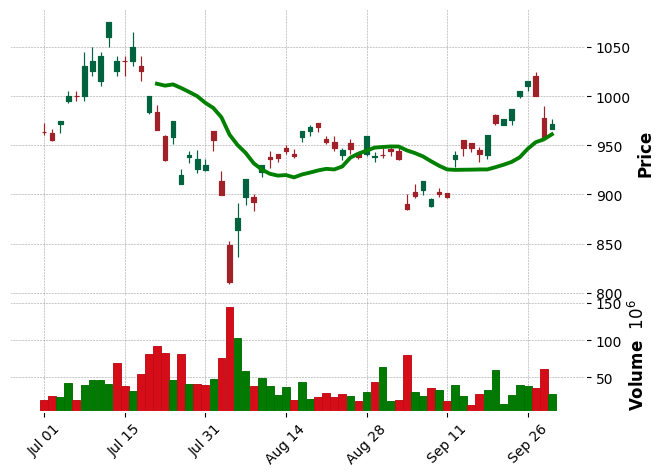

RSI


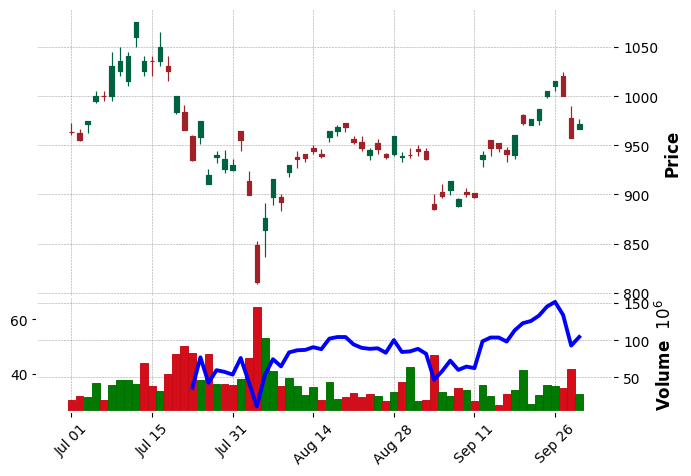

MACD


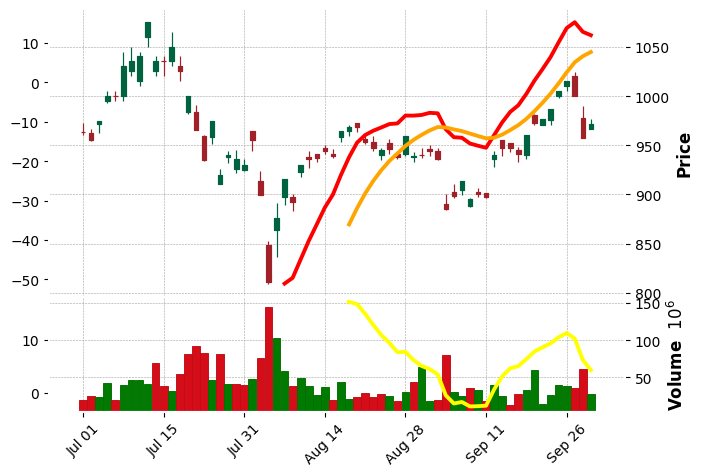

In [ ]:
import mplfinance as mpf

# 視覺化K線圖並疊加技術指標

# 將'日期'列轉換為datetime類型為常用的日期轉換函數，同時移除時區資訊。
yahoo_df['日期'] = pd.to_datetime(yahoo_df['日期']).dt.tz_localize(None)
# 將'日期'列設定為資料框的索引，且在原始資料框上直接進行修改。
yahoo_df.set_index('日期', inplace=True)
# 將原本的中文列名重新命名為英文，以適配mplfinance庫的繪圖要求，且修改直接在原始資料框中進行。
yahoo_df.rename(columns={'開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close', '成交量': 'Volume'}, inplace=True)
print("SMA")
# 繪製K線圖，疊加了15天的SMA作為藍色曲線。candle表示繪製K線圖，volume=True表示繪製成交量。
mpf.plot(yahoo_df, type='candle', volume=True, style='charles',
 addplot=[mpf.make_addplot(yahoo_df['SMA_15'], color='green')])
print("RSI")
# 繪製K線圖，疊加了15天的RSI作為綠色曲線。可設置panel表示繪製在圖表的下方新面板中。
mpf.plot(yahoo_df, type='candle', volume=True, style='charles',
 addplot=[mpf.make_addplot(yahoo_df['RSI_15'], panel=1, color='blue')])
print("MACD")
# 繪製K線圖，並在圖表中疊加MACD線、訊號線和長條圖，分別以紅色、橘色和黃色表示。
mpf.plot(yahoo_df, type='candle', volume=True, style='charles',
 addplot=[
 mpf.make_addplot(yahoo_df['MACD'], color='red'),
 mpf.make_addplot(yahoo_df['MACD_signal'], color='orange'),
 mpf.make_addplot(yahoo_df['MACD_hist'], panel=1, color='yellow')
 ])

# 機器學習模型預測

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 使用機器學習模型預測股價漲跌

# 增加目標變量，判斷明天的收盤價是否上漲
# 為yahoo_df增加了一個目標變數'Target'，用來判斷未來一天的收盤價是否高於目前的收盤價。如果第二天的收盤價高，則目標值為1，否則為0。
# yahoo_df['Target'] = np.where(yahoo_df['Close'].shift(-1) > yahoo_df['Close'], 1, 0)
# 為yahoo_df增加了一個目標變數'Target'，用來把明天的收盤價搬到今天，以便回歸預測。
n = 1
yahoo_df['Target'] = yahoo_df['Close'].shift(-n)

# 刪除yahoo_df中的所有包含缺失值的行。
yahoo_df.dropna(inplace=True)
# 準備定義特徵集X和標籤y，其中X包含計算得到的技術指標，y是目標變數（股價漲跌）。
features = ['SMA_15', 'RSI_15', 'MACD', 'MACD_signal', 'MACD_hist']
X = yahoo_df[features] # 特徵
y = yahoo_df['Target'] # 標籤

# 分割資料集
# print(yahoo_df.shape)
# print(X.shape)
# print(y.shape)
# 將資料集依80%的訓練資料和20%的測試資料進行劃分。shuffle=False表示不打亂數據，保持時間順序。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# print(X_train.shape)
# print(y_test.shape)

# 迴歸模型
# 初始化線性迴歸模型，使用訓練資料擬合模型，然後對測試資料進行預測。
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# 計算並輸出線性迴歸模型的均方誤差（MSE），用來衡量模型預測的準確性。
print("第一種方法")
print(f"線性迴歸預測: {y_pred_lr}")
print(f"線性迴歸MSE: {mean_squared_error(y_test, y_pred_lr)}")

# 決策樹迴歸模型
# 初始化決策樹迴歸模型，訓練後對測試集進行預測。
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
# 計算並輸出決策樹模型的均方誤差（MSE）。
print("第二種方法")
print(f"決策樹預測: {y_pred_dt}")
print(f"決策樹MSE: {mean_squared_error(y_test, y_pred_dt)}")

# 隨機森林迴歸模型
# 初始化隨機森林迴歸模型，n_estimators=100表示使用100棵樹，訓練後對測試集進行預測。
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# 計算並輸出隨機森林模型的均方誤差（MSE）。
print("第三種方法")
print(f"隨機森林預測: {y_pred_rf}")
print(f"隨機森林MSE: {mean_squared_error(y_test, y_pred_rf)}")

第一種方法
線性迴歸預測: [974.60175674 978.61144955 984.4572003  992.72199057 994.54606819
 981.35696307]
線性迴歸MSE: 269.5737825394646
第二種方法
決策樹預測: [973. 973. 973. 973. 973. 973.]
決策樹MSE: 664.1666666666666
第三種方法
隨機森林預測: [966.79690308 966.38534851 966.10788879 965.76127319 964.32470276
 963.3594635 ]
隨機森林MSE: 963.2141972887853


# ARIMA模型預測可視化


訓練集長度: 48
測試集長度: 12
MSE: 1443.4538965678587


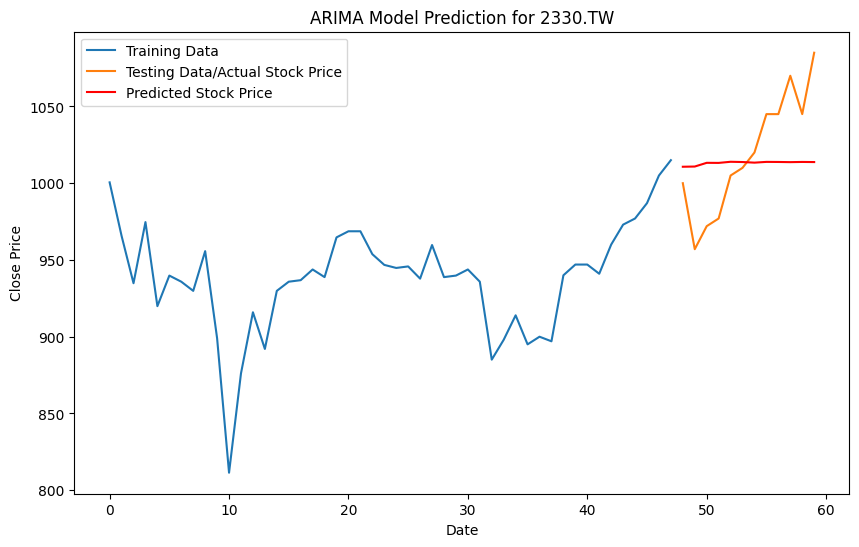

In [ ]:
# 引入ARIMA模型
from statsmodels.tsa.arima.model import ARIMA
# 計算mse誤差
from sklearn.metrics import mean_squared_error

# 選擇收盤價作為預測目標
close_prices = yahoo_df['收盤價']

# 分割訓練集(80%)和測試集(20%)
train_data = close_prices[:int(0.8 * len(close_prices))]
test_data = close_prices[int(0.8 * len(close_prices)):]
print(f"訓練集長度: {len(train_data)}")
print(f"測試集長度: {len(test_data)}")

# 創建並擬合ARIMA模型(p,d,q分別代表自回歸項，差分階數，移動平均項)
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# 進行預測
predictions = model_fit.forecast(steps=len(test_data))

# 計算並印出誤差MSE
mse_optimized = mean_squared_error(test_data, predictions)
print(f"MSE: {mse_optimized}")

# 可視化預測結果
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data/Actual Stock Price')
plt.plot(test_data.index, predictions, label='Predicted Stock Price', color='red')
plt.title(f'ARIMA Model Prediction for {ticker}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 量化交易策略進行回測

## 均值回歸策略（移動平均交叉策略）

### 如何產生買入和賣出信號？

* 黃金交叉（Golden Cross）：當短期移動平均線（短期 MA）從下方突破長期移動平均線（長期 MA），這被認為是一個買入信號。這代表著短期內價格上升的趨勢開始超過長期趨勢，市場可能進入一個上漲階段。

* 死亡交叉（Death Cross）：當短期 MA從上方跌破長期 MA，這被認為是一個賣出信號。這代表著短期內的價格趨勢弱於長期趨勢，市場可能進入下跌階段。

<ipython-input-22-bb6f5268f7c5>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  yahoo_df['Signal'][50:] = np.where(yahoo_df['SMA_50'][50:] > yahoo_df['SMA_200'][50:], 1, -1)
<ipython-input-22-bb6f5268f7c5>:14: SettingWithCopyWarning: 
A va

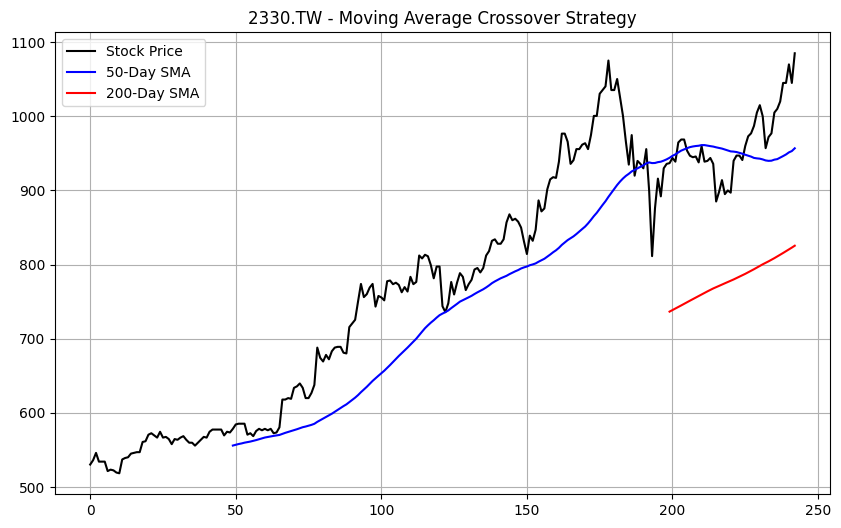

In [ ]:
# 引入NumPy套件
import numpy as np

# 計算短期（50天）和長期（200天）移動平均線
yahoo_df['SMA_50'] = yahoo_df['收盤價'].rolling(window=50).mean()
yahoo_df['SMA_200'] = yahoo_df['收盤價'].rolling(window=200).mean()

# 量化策略：當短期均線高於長期均線時買入，否則賣出

# 初始訊號為0代表沒有買賣操作
yahoo_df['Signal'] = 0
# 生成交易訊號，買入時為1，賣出時為-1
# np.where類似於IF函數，判斷如果大於，則傳回1，反之則傳回-1
yahoo_df['Signal'][50:] = np.where(yahoo_df['SMA_50'][50:] > yahoo_df['SMA_200'][50:], 1, -1)

# 買賣操作通常是在訊號產生的下一天進行，因此將Signal列的值向下移動一行
yahoo_df['Position'] = yahoo_df['Signal'].shift()

# 繪製移動平均線和股票價格
plt.figure(figsize=(10, 6))
plt.plot(yahoo_df['收盤價'], label='Stock Price', color='black')
plt.plot(yahoo_df['SMA_50'], label='50-Day SMA', color='blue')
plt.plot(yahoo_df['SMA_200'], label='200-Day SMA', color='red')
plt.title(f'{ticker} - Moving Average Crossover Strategy')
plt.legend()
plt.grid(True)
plt.show()

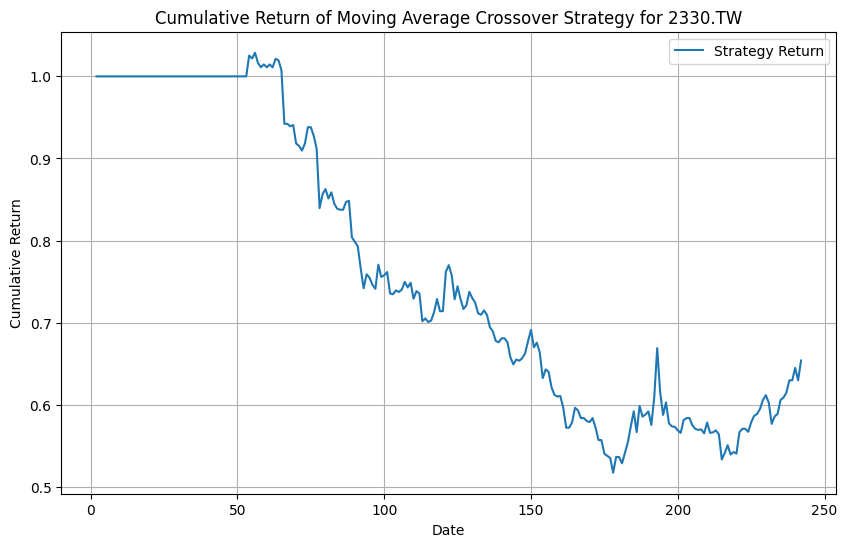

In [ ]:
# 計算每日回報
# 是Pandas中計算每天收盤價的百分比變化。公式為：(今收盤價−昨收盤價)/昨收盤價
# 即股票的漲跌幅度，用於後續的策略報酬計算
yahoo_df['Daily Return'] = yahoo_df['收盤價'].pct_change()

# 計算策略的累計回報(計算基於策略的每日回報)
# 若為1，表示看漲，獲得正的每日報酬；若為-1，表示看跌，獲得反方向的回報
# 將交易訊號（買入/賣出）與每日的價格變化連結起來
yahoo_df['Strategy Return'] = yahoo_df['Daily Return'] * yahoo_df['Position'].shift()

# 計算策略的累計收益
# 先表示當天的收益，包括原始資金（即1）和當日的策略收益，再用Pandas中的累積乘積函數，用於計算從最初開始的累積回報
# 累計回報公式為：累積收益=(1+每日回報)×(1+前一日回報)×…，用於計算整個回測期間內的累計策略回報。累積乘積代表了策略在整個交易期間的總收益
yahoo_df['Cumulative Strategy Return'] = (1 + yahoo_df['Strategy Return']).cumprod()

# 繪製策略的累計收益曲線
plt.figure(figsize=(10, 6))
plt.plot(yahoo_df['Cumulative Strategy Return'], label='Strategy Return')
plt.title(f'Cumulative Return of Moving Average Crossover Strategy for {ticker}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()